## Importing external packages

In [1]:
#SampurnaM, 14.11 pm, 25-4-24
import MDAnalysis as mda
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nglview as nv
import prolif as plf
## specific function imports:
#distance
from MDAnalysis.analysis import contacts
#creating dataframe from indices and parsing lists into dictionary
from collections import Counter
## for RSA calculation using DSSP
from Bio.PDB import PDBParser
from Bio.PDB.DSSP import DSSP
from pathlib import Path # get pdb file name without extension

/home/sampurna/anaconda3/envs/prolif/lib/python3.10/site-packages/MDAnalysis/topology/tables.py:52: DeprecationWarning: Deprecated in version 2.8.0
MDAnalysis.topology.tables has been moved to MDAnalysis.guesser.tables. This import point will be removed in MDAnalysis version 3.0.0
  warnings.warn(wmsg, category=DeprecationWarning)


## Importing own module

In [2]:
##importing my own module
#https://www.geeksforgeeks.org/create-and-import-modules-in-python/
import sampurna_thesis

In [3]:
# Test if the module has been imported properly
#distance and indices
a1101 = sampurna_thesis.distance_and_indices("a1101_complex.pdb")

In [5]:
## Shrake Rupley for SASA

In [6]:
from Bio.PDB.SASA import ShrakeRupley

##  Driver code : a1101_static_pdb_file characteristics

In [ ]:
#distance and indices
a1101 = sampurna_thesis.distance_and_indices("a1101_complex.pdb")
a1101.indice_generation_hla_ab_water()
##prolif
a1101_plf_obj_creation =  sampurna_thesis.prolif_generation_and_parsing("a1101_complex.pdb",a1101)
a1101_plf_obj_creation.prolif_fp_generation("a1101_plf_test_class.pkl","a1101_plf_test")
a1101_plf_obj_creation.add_plf_atoms()
a1101_plf_obj_creation.prolif_nci_add(a1101_plf_obj_creation.hla_ab_prolif_df,a1101.hla_ab_indices)
## filling NAs for DSSP
a1101.hla_ab_indices[a1101.hla_ab_indices.select_dtypes('object').columns] = a1101.hla_ab_indices.select_dtypes('object').fillna("NonExistent")
a1101.hla_ab_indices[a1101.hla_ab_indices.select_dtypes('number').columns] = a1101.hla_ab_indices.select_dtypes('number').fillna(0)
#running dssp
a1101_dssp = sampurna_thesis.dssp_gen_and_parse("a1101_complex.pdb","a1101_complex",a1101.hla_ab_indices)
a1101_dssp.dssp_generation()
a1101_dssp.dssp_parsing()
##adding cdrs
a1101_cdr = sampurna_thesis.cdr_annotation(a1101_dssp.index_df_with_nci)
##parsing cdr df to get only the HLA residues with exisiting contacts with Ab
a1101_hla_only = a1101_dssp.index_df_with_nci[a1101_dssp.index_df_with_nci.unique_protein_interface_res != "NonExistent"]
### checking for surface exposure
a1101_hla_only.loc[a1101_hla_only.RSA >= 0.2,"Surface_exposure"] = "Exposed"
a1101_hla_only.loc[a1101_hla_only.RSA < 0.2,"Surface_exposure"] = "Buried"

### reading in fingerprints for plotting

In [5]:
##parsing cdr df to get only the HLA residues with exisiting contacts with Ab
#a1101_hla_only = a1101_dssp.index_df_with_nci[a1101_dssp.index_df_with_nci.unique_protein_interface_res != "NonExistent"]
### checking for surface exposure
a1101_hla_only.loc[a1101_hla_only.RSA >= 0.2,"Surface_exposure"] = "Exposed"
a1101_hla_only.loc[a1101_hla_only.RSA < 0.2,"Surface_exposure"] = "Buried"

In [6]:
a1101_hla_only.loc[a1101_hla_only.NCI_type == "nan","NCI_type"] = "NonExistent"

In [7]:
a1101_hla_only

,unique_protein_interface_res,how_many_contacts_with_ab_res,unique_protein_name_interface_atoms,how_many_contacts_with_ab_atoms,unique_ab_interface_res,how_many_contacts_with_protein_res,unique_ab_interface_atoms,how_many_contacts_with_protein_atoms,NCI,NCI_type,RSA,Surface_exposure
0,ARG15,10.0,CB118,1.0,ILE734,29.0,CD1796,4,4.0,Hydrophobic,0.108871,Buried
1,PRO16,6.0,CZ122,3.0,TYR664,26.0,CE1240,6,2.0,Hydrophobic,0.205882,Exposed
2,GLY17,29.0,NH1123,4.0,TRP1050,23.0,CZ242,5,7.0,HBAcceptor,0.02381,Buried
3,ARG18,63.0,NH2124,2.0,TRP1055,11.0,OH243,8,11.0,VdWContact,0.056452,Buried
4,GLY19,13.0,C127,2.0,HID666,10.0,CE2241,3,3.0,VdWContact,0.130952,Buried
5,GLU20,10.0,O128,1.0,VAL730,7.0,CD22404,3,3.0,VdWContact,0.175258,Buried
6,SER39,1.0,CB129,3.0,TRP681,27.0,CE22405,4,0.0,NonExistent,0.115385,Buried
7,ASP40,30.0,N132,7.0,THR731,11.0,CZ22453,4,5.0,VdWContact,0.07362,Buried
8,ALA41,12.0,CA133,9.0,VAL738,7.0,CD12403,3,3.0,VdWContact,0.066038,Buried
9,ALA42,19.0,C134,5.0,PRO737,3.0,NE12407,2,2.0,HBDonor,0.566038,Exposed


In [8]:
#saving this to csv
a1101_hla_only.to_csv("a1101_output_from_sampurna_thesis_run.csv")

### Adding code to convert the resname to proper values as in paper: https://www.nature.com/articles/s41467-019-08790-1


In [9]:
a1101_hla_only.head(5)

,unique_protein_interface_res,how_many_contacts_with_ab_res,unique_protein_name_interface_atoms,how_many_contacts_with_ab_atoms,unique_ab_interface_res,how_many_contacts_with_protein_res,unique_ab_interface_atoms,how_many_contacts_with_protein_atoms,NCI,NCI_type,RSA,Surface_exposure
0,ARG15,10.0,CB118,1.0,ILE734,29.0,CD1796,4,4.0,Hydrophobic,0.108871,Buried
1,PRO16,6.0,CZ122,3.0,TYR664,26.0,CE1240,6,2.0,Hydrophobic,0.205882,Exposed
2,GLY17,29.0,NH1123,4.0,TRP1050,23.0,CZ242,5,7.0,HBAcceptor,0.02381,Buried
3,ARG18,63.0,NH2124,2.0,TRP1055,11.0,OH243,8,11.0,VdWContact,0.056452,Buried
4,GLY19,13.0,C127,2.0,HID666,10.0,CE2241,3,3.0,VdWContact,0.130952,Buried


In [10]:
for index, rows in a1101_hla_only.iterrows():
    #print(index,"index",rows)
    #print(rows["unique_protein_interface_res"])
    resname_list = [char for char in rows["unique_protein_interface_res"] if char.isalpha()]
    resname = ''.join(resname_list) 
    resnum_list = [char for char in rows["unique_protein_interface_res"] if char.isdigit()]
    resnum = ''.join(resnum_list)
    resnum = int(resnum)
    if resnum<=276:
        a1101_hla_only.loc[a1101_hla_only.unique_protein_interface_res==rows["unique_protein_interface_res"],"HLA_chain"] = "HLA-alpha"
    elif resnum>276 and resnum<820:
        a1101_hla_only.loc[a1101_hla_only.unique_protein_interface_res==rows["unique_protein_interface_res"],"HLA_chain"] = "b2m"
    else:
        a1101_hla_only.loc[a1101_hla_only.unique_protein_interface_res==rows["unique_protein_interface_res"],"HLA_chain"] = "peptide"
    ##correcting the resname + resname
    print("This is resname and resnum", resname, resnum)
    if resnum<=276:
        resnum = resnum -1
        #print("New resnum", resnum)
    elif resnum>276 and resnum<820:
        resnum = (resnum -462)+1
        #print("New resnum", resnum)
    else:
        resnum = (resnum -820)+1
        #print("New resnum", resnum)
    new_resname_resnum = resname+str(resnum)
    a1101_hla_only.loc[a1101_hla_only.unique_protein_interface_res==rows["unique_protein_interface_res"],"unique_protein_interface_res"] = new_resname_resnum  


This is resname and resnum ARG 15
This is resname and resnum PRO 16
This is resname and resnum GLY 17
This is resname and resnum ARG 18
This is resname and resnum GLY 19
This is resname and resnum GLU 20
This is resname and resnum SER 39
This is resname and resnum ASP 40
This is resname and resnum ALA 41
This is resname and resnum ALA 42
This is resname and resnum GLN 44
This is resname and resnum SER 89
This is resname and resnum GLU 90
This is resname and resnum ASP 91
This is resname and resnum SER 93
This is resname and resnum ASP 496
This is resname and resnum ILE 497
This is resname and resnum GLU 498
This is resname and resnum ARG 507
This is resname and resnum GLU 509
This is resname and resnum ASN 545
This is resname and resnum HIE 546
This is resname and resnum VAL 547


/tmp/ipykernel_1424/4074296474.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1101_hla_only.loc[a1101_hla_only.unique_protein_interface_res==rows["unique_protein_interface_res"],"HLA_chain"] = "HLA-alpha"


### Plotting:

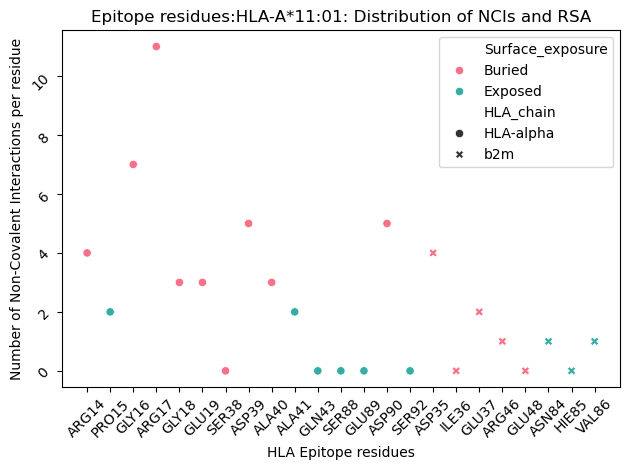

In [11]:
a1101_static= sns.scatterplot(data=a1101_hla_only,x="unique_protein_interface_res", y="NCI", hue="Surface_exposure", style = "HLA_chain",
               palette ="husl")
                #x="total_bill", y="tip", hue="day", style="time")
a1101_static.tick_params(labelrotation = 45)
#a1101_static.tight_layout()
##setting xlabel and y labels
a1101_static.set_ylabel("Number of Non-Covalent Interactions per residue")
a1101_static.set_xlabel("HLA Epitope residues")
## setting title
a1101_static.set_title("Epitope residues:HLA-A*11:01: Distribution of NCIs and RSA")
plt.tight_layout()
plt.savefig("a1101_pdb_nci_rsa.png")

plt.show()